In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:

lr = 1.0e-4
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, weight decay {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 0.0001, weight decay 0.1


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.9740	Val Loss:	1.2432	Accuracy:	0.3109	F1:	0.2483
2 / 30: Train Loss:	1.3704	Val Loss:	1.1662	Accuracy:	0.3613	F1:	0.1948
3 / 30: Train Loss:	1.1912	Val Loss:	1.0847	Accuracy:	0.3866	F1:	0.2718
4 / 30: Train Loss:	1.1281	Val Loss:	1.0630	Accuracy:	0.3697	F1:	0.2244
5 / 30: Train Loss:	1.0842	Val Loss:	1.0392	Accuracy:	0.4286	F1:	0.3412
6 / 30: Train Loss:	1.0775	Val Loss:	1.0163	Accuracy:	0.4538	F1:	0.4086
7 / 30: Train Loss:	1.0307	Val Loss:	0.9826	Accuracy:	0.5546	F1:	0.5256
8 / 30: Train Loss:	0.9529	Val Loss:	0.9393	Accuracy:	0.6134	F1:	0.6084
9 / 30: Train Loss:	0.8921	Val Loss:	0.8235	Accuracy:	0.6218	F1:	0.6216
10 / 30: Train Loss:	0.7376	Val Loss:	0.7470	Accuracy:	0.6303	F1:	0.6309
11 / 30: Train Loss:	0.6781	Val Loss:	0.7612	Accuracy:	0.6387	F1:	0.6367
12 / 30: Train Loss:	0.5653	Val Loss:	0.8659	Accuracy:	0.6218	F1:	0.6257
13 / 30: Train Loss:	0.4954	Val Loss:	0.8367	Accuracy:	0.6471	F1:	0.6506
14 / 30: Train Loss:	0.4175	Val Loss:	1.1202	Accuracy:	0.613

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.9762	Val Loss:	1.2451	Accuracy:	0.3277	F1:	0.2682
2 / 30: Train Loss:	1.4458	Val Loss:	1.1494	Accuracy:	0.3697	F1:	0.2844
3 / 30: Train Loss:	1.2068	Val Loss:	1.0961	Accuracy:	0.4118	F1:	0.3405
4 / 30: Train Loss:	1.1599	Val Loss:	1.0546	Accuracy:	0.4118	F1:	0.3060
5 / 30: Train Loss:	1.0912	Val Loss:	1.0484	Accuracy:	0.4622	F1:	0.3846
6 / 30: Train Loss:	1.0935	Val Loss:	1.0242	Accuracy:	0.4958	F1:	0.4471
7 / 30: Train Loss:	1.0615	Val Loss:	0.9958	Accuracy:	0.4958	F1:	0.4641
8 / 30: Train Loss:	1.0154	Val Loss:	0.9571	Accuracy:	0.6050	F1:	0.6066
9 / 30: Train Loss:	0.9555	Val Loss:	0.9153	Accuracy:	0.6303	F1:	0.6347
10 / 30: Train Loss:	0.8388	Val Loss:	0.9066	Accuracy:	0.6218	F1:	0.6198
11 / 30: Train Loss:	0.7750	Val Loss:	1.0088	Accuracy:	0.5546	F1:	0.5207
12 / 30: Train Loss:	0.8031	Val Loss:	1.1423	Accuracy:	0.5042	F1:	0.4730
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-s

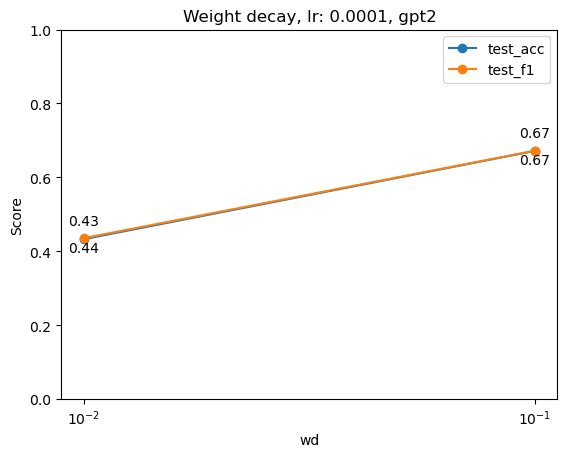

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f